# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 30

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,3.947368,15,17.571071,3.8,4.451338,NaN,4.420480,2.053249
560,Kelleher,Liverpool,45,2.000000,10,8.433770,5.0,4.216885,NaN,4.238418,1.987859
12,Martínez,Aston Villa,54,29.074074,157,132.645428,5.4,4.562327,3.845345,4.436756,1.963313
213,Meslier,Leeds United,47,28.863636,127,113.920960,4.4,3.946868,5.910188,3.719880,1.820554
597,Sánchez,Brighton,45,19.210526,73,73.080800,3.8,3.804206,3.869666,3.857922,1.793320
96,Pope,Burnley,55,28.888889,130,121.243062,4.5,4.196875,2.505537,4.276863,1.789554
431,Fabianski,West Ham,50,28.000000,112,109.398095,4.0,3.907075,2.998646,4.027600,1.747297
245,Adrián,Liverpool,42,2.972973,11,10.617766,3.7,3.571431,5.730734,3.592963,1.742680
326,Dubravka,Newcastle Utd,48,5.000000,18,19.014827,3.6,3.802965,NaN,3.705578,1.735808


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,20.871218,7.0,5.217805,NaN,5.005244,2.487491
277,Cancelo,Manchester City,60,23.018868,122,123.275744,5.3,5.355422,5.341298,5.354368,2.186342
273,Stones,Manchester City,53,17.941176,122,89.588945,6.8,4.993482,5.408468,4.990804,2.169030
75,Bernardo,Brighton,39,2.941176,5,11.699236,1.7,3.977740,NaN,4.030919,2.014207
123,James,Chelsea,50,24.166667,87,104.744225,3.6,4.334244,3.262162,4.217803,1.938333
104,Alonso,Chelsea,57,10.000000,42,44.354047,4.2,4.435405,6.315901,4.275769,1.857787
442,Masuaku,West Ham,43,11.052632,42,42.298127,3.8,3.826973,4.035674,3.922916,1.845530
232,Chilwell,Chelsea,58,20.800000,104,91.954500,5.0,4.420889,4.137488,4.301853,1.835674
470,Kilman,Wolves,39,15.000000,54,54.329351,3.6,3.621957,NaN,4.064526,1.834049


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,60,22.903226,142,125.922118,6.2,5.498008,3.798509,5.505332,2.244552
301,Lingard,West Ham,63,8.000000,68,43.634915,8.5,5.454364,5.974122,5.416481,2.173071
105,Jorginho,Chelsea,47,21.136364,93,87.770943,4.4,4.152604,4.002308,3.951892,1.915453
570,Raphinha,Leeds United,57,25.111111,113,113.371349,4.5,4.514788,5.419014,4.132242,1.891037
302,Fernandes,Manchester Utd,116,30.140845,214,193.798937,7.1,6.429778,4.823887,6.451779,1.887848
37,Grealish,Aston Villa,75,21.864407,129,111.824739,5.9,5.114465,NaN,4.972733,1.867539
24,Saka,Arsenal,52,25.263158,96,107.440096,3.8,4.252837,3.267385,4.596941,1.864992
272,De Bruyne,Manchester City,119,24.150943,128,152.876084,5.3,6.330025,5.772871,6.340328,1.834983
203,Harrison,Leeds United,54,28.837209,124,117.494068,4.3,4.074391,4.809119,3.756584,1.753339


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,67,29.811321,158,149.986008,5.3,5.031176,4.301333,4.641847,1.943713
506,Wilson,Newcastle Utd,65,21.090909,116,103.724006,5.5,4.917949,NaN,4.809873,1.928978
388,Kane,Tottenham,117,27.945205,204,182.075346,7.3,6.515441,7.486651,6.780544,1.904807
224,Vardy,Leicester City,101,26.140351,149,147.928011,5.7,5.658991,5.159094,5.937899,1.780649
437,Antonio,West Ham,67,20.930233,90,95.036671,4.3,4.540641,4.502667,4.464485,1.754203
514,Watkins,Aston Villa,66,28.863636,127,129.184006,4.4,4.475666,3.837832,4.365905,1.742151
164,Calvert-Lewin,Everton,76,26.037736,138,124.044006,5.3,4.764009,4.340000,4.540733,1.728088
91,Wood,Burnley,62,25.135135,93,103.127334,3.7,4.102915,5.841467,4.000945,1.647770
665,Maja,Fulham,55,8.965517,26,34.400000,2.9,3.836923,2.920000,3.671684,1.636069


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,117,27.945205,204,182.075346,7.3,6.515441,6.780544,1.904807
302,Fernandes,Manchester Utd,116,30.140845,214,193.798937,7.1,6.429778,6.451779,1.887848
272,De Bruyne,Manchester City,119,24.150943,128,152.876084,5.3,6.330025,6.340328,1.834983
254,Salah,Liverpool,124,28.888889,182,169.537951,6.3,5.868621,6.016803,1.666576
224,Vardy,Leicester City,101,26.140351,149,147.928011,5.7,5.658991,5.937899,1.780649
271,Gündogan,Manchester City,60,22.903226,142,125.922118,6.2,5.498008,5.505332,2.244552
301,Lingard,West Ham,63,8.000000,68,43.634915,8.5,5.454364,5.416481,2.173071
277,Cancelo,Manchester City,60,23.018868,122,123.275744,5.3,5.355422,5.354368,2.186342
390,Son,Tottenham,94,29.032258,180,154.423349,6.2,5.319026,5.533181,1.734875


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,7.0,5.217805,NaN,4.457683,5.005244,2.487491
271,Gündogan,Manchester City,60,22.903226,6.2,5.498008,3.798509,6.199245,5.505332,2.244552
277,Cancelo,Manchester City,60,23.018868,5.3,5.355422,5.341298,5.580141,5.354368,2.186342
301,Lingard,West Ham,63,8.000000,8.5,5.454364,5.974122,5.424868,5.416481,2.173071
273,Stones,Manchester City,53,17.941176,6.8,4.993482,5.408468,5.080036,4.990804,2.169030
112,Arrizabalaga,Chelsea,47,3.947368,3.8,4.451338,NaN,5.047718,4.420480,2.053249
75,Bernardo,Brighton,39,2.941176,1.7,3.977740,NaN,4.257763,4.030919,2.014207
560,Kelleher,Liverpool,45,2.000000,5.0,4.216885,NaN,4.212108,4.238418,1.987859
12,Martínez,Aston Villa,54,29.074074,5.4,4.562327,3.845345,4.072166,4.436756,1.963313


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,3.947368,15,17.571071,3.8,4.451338,6.986341,4.420480,2.053249
388,Kane,Tottenham,117,27.945205,204,182.075346,7.3,6.515441,6.691101,6.780544,1.904807
239,Justin,Leicester City,49,22.954545,101,90.031958,4.4,3.922184,6.618239,4.409836,1.771862
302,Fernandes,Manchester Utd,116,30.140845,214,193.798937,7.1,6.429778,6.309027,6.451779,1.887848
506,Wilson,Newcastle Utd,65,21.090909,116,103.724006,5.5,4.917949,5.765906,4.809873,1.928978
245,Adrián,Liverpool,42,2.972973,11,10.617766,3.7,3.571431,5.730734,3.592963,1.742680
104,Alonso,Chelsea,57,10.000000,42,44.354047,4.2,4.435405,5.729648,4.275769,1.857787
233,Iheanacho,Leicester City,58,16.764706,57,56.320000,3.4,3.359439,5.628571,3.497909,1.394931
570,Raphinha,Leeds United,57,25.111111,113,113.371349,4.5,4.514788,5.622545,4.132242,1.891037


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,119,24.150943,128,152.876084,5.3,6.330025,7.284480,1.834983
388,Kane,Tottenham,117,27.945205,204,182.075346,7.3,6.515441,6.368955,1.904807
271,Gündogan,Manchester City,60,22.903226,142,125.922118,6.2,5.498008,6.199245,2.244552
254,Salah,Liverpool,124,28.888889,182,169.537951,6.3,5.868621,6.074030,1.666576
302,Fernandes,Manchester Utd,116,30.140845,214,193.798937,7.1,6.429778,5.932040,1.887848
276,Sterling,Manchester City,113,26.153846,136,133.737571,5.2,5.113495,5.825857,1.521173
277,Cancelo,Manchester City,60,23.018868,122,123.275744,5.3,5.355422,5.580141,2.186342
251,Mané,Liverpool,118,26.808511,126,142.421727,4.7,5.312557,5.496198,1.546545
301,Lingard,West Ham,63,8.000000,68,43.634915,8.5,5.454364,5.424868,2.173071


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
388,Kane,Tottenham,117,27.945205,7.3,6.515441,6.368955,1.904807,16.4,6.3,22.7,0.812304
224,Vardy,Leicester City,101,26.140351,5.7,5.658991,5.234062,1.780649,16.0,4.2,20.2,0.772752
254,Salah,Liverpool,124,28.888889,6.3,5.868621,6.074030,1.666576,15.1,4.3,19.4,0.671538
202,Bamford,Leeds United,67,29.811321,5.3,5.031176,3.992571,1.943713,14.5,3.4,17.9,0.600443
302,Fernandes,Manchester Utd,116,30.140845,7.1,6.429778,5.932040,1.887848,13.0,10.1,23.1,0.766402
164,Calvert-Lewin,Everton,76,26.037736,5.3,4.764009,4.140260,1.728088,12.9,1.2,14.1,0.541522
514,Watkins,Aston Villa,66,28.863636,4.4,4.475666,4.135038,1.742151,12.9,2.9,15.8,0.547402
251,Mané,Liverpool,118,26.808511,4.7,5.312557,5.496198,1.546545,11.8,4.0,15.8,0.589365
68,Maupay,Brighton,61,28.285714,3.5,4.008902,4.194369,1.623157,10.7,3.3,14.0,0.494949


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week28,assists_week29,assists_week3,assists_week30,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,...,xG_week20,xG_week21,xG_week22,xG_week23,xG_week24,xG_week25,xG_week26,xG_week27,xG_week28,xG_week29,xG_week3,xG_week30,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 28,xPoints week 29,xPoints week 3,xPoints week 30,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
620,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
435,128.122081,4.239334,10,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,20,633,100.0,100.0,36.048738,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,1.62834,2.204777,2.297094,2.141341,4.239672,3.331484,2.441341,3.174192,4.426123,10.087068,NaN,8.071518,1.807586,6.780022,2.539465,4.297316,7.590127,9.194725,3.331484,3.726123,7.440687,3.204777,1.030734,6.186341,1.62834,12.264926,5.095811,3.331484,1.661196,5.430734,5.495247,2


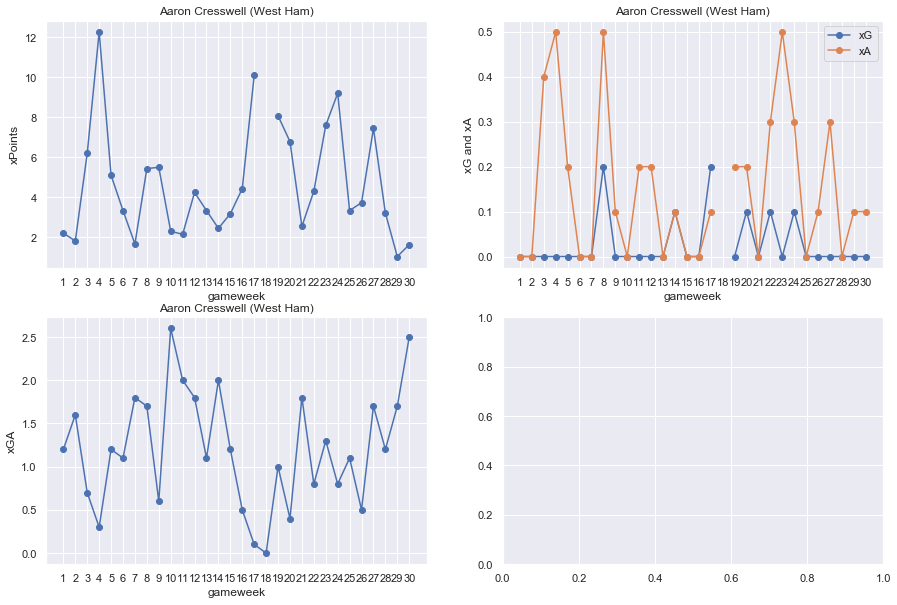

In [14]:
# find player index
name_string = 'Cress'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 435

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('De '),'web_name']

id
272    De Bruyne
Name: web_name, dtype: object

In [16]:
my_starting11 = [12,109,435,277,570,302,272,37,388,202,437] #vardy=224, grealish=37, mane=251
my_subs = [597,558,23,74]

In [17]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 63.11804063213291
Expected points next gameweek: 61.97019535892258


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,54,29.074074,5.4,4.562327,3.845345,4.818757,4.072166,4.436756,1.963313
109,Rüdiger,Chelsea,47,13.061224,4.9,3.969203,3.470821,4.456434,4.575016,3.917430,1.830857
435,Cresswell,West Ham,59,30.222222,4.5,4.239334,3.406132,4.398378,4.184059,4.338283,1.745306
277,Cancelo,Manchester City,60,23.018868,5.3,5.355422,5.341298,4.077460,5.580141,5.354368,2.186342
570,Raphinha,Leeds United,57,25.111111,4.5,4.514788,5.419014,5.622545,3.525211,4.132242,1.891037
302,Fernandes,Manchester Utd,116,30.140845,7.1,6.429778,4.823887,6.309027,5.932040,6.451779,1.887848
272,De Bruyne,Manchester City,119,24.150943,5.3,6.330025,5.772871,4.940441,7.284480,6.340328,1.834983
37,Grealish,Aston Villa,75,21.864407,5.9,5.114465,NaN,3.277090,4.649503,4.972733,1.867539
388,Kane,Tottenham,117,27.945205,7.3,6.515441,7.486651,6.691101,6.368955,6.780544,1.904807



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,45,19.210526,3.8,3.804206,3.869666,4.600937,3.999928,3.857922,1.793320
558,Coufal,West Ham,46,25.675676,3.7,3.873796,3.285608,3.570548,3.817989,3.970618,1.806167
23,Smith Rowe,Arsenal,42,13.939394,3.3,3.247667,1.898862,2.626066,3.504982,3.477590,1.584699
74,White,Brighton,45,28.928571,2.8,3.172851,3.389666,3.940937,3.384644,3.226465,1.495696


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)